In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [4]:
member = 'clockworkorange'
file = member+'sortmatch2.csv'
# beer =  pd.read_csv('brutaltruthmatch-pr.csv', encoding = "ISO-8859-1")
beer =  pd.read_csv(file, encoding = "ISO-8859-1")
beer.columns

Index(['beer_link', 'rDev', 'user_rating', 'ABV', 'Availaility', 'Brewer',
       'BrosScore', 'ImageLink', 'Location', 'Name', 'Ranking', 'RatingCount',
       'ReviewCount', 'Score', 'ScoreClass', 'Style', 'URL', 'pDev', 'Flavor',
       'Hoppiness', 'Maltiness', 'Fruitiness', 'Body', 'Sweetness', 'Sour',
       'spicy', 'bitter', 'Aroma_None', 'Aroma_caramel', 'Aroma_floral',
       'Aroma_fruit', 'Custom Flavor_None', 'Custom Flavor_banana',
       'Custom Flavor_brown sugar', 'Custom Flavor_burnt',
       'Custom Flavor_caramel', 'Custom Flavor_chocolate',
       'Custom Flavor_earthy', 'Custom Flavor_herbal', 'Custom Flavor_pumpkin',
       'Custom Flavor_roasted', 'Custom Flavor_smoke', 'Custom Flavor_toasted',
       'Custom Flavor_wheat', 'Color_amber', 'Color_black', 'Color_dark ',
       'Color_gold', 'Color_pale', 'bin', 'good', 'goodtest'],
      dtype='object')

In [5]:
X = beer[["Flavor","Hoppiness","Maltiness","Fruitiness","Body", "pDev",
          "Sweetness","Sour","spicy","bitter", 'Aroma_None', 'Aroma_caramel',
       'Aroma_floral', 'Aroma_fruit', 'Custom Flavor_None',
       'Custom Flavor_banana', 'Custom Flavor_brown sugar',
       'Custom Flavor_burnt', 'Custom Flavor_caramel',
       'Custom Flavor_chocolate', 'Custom Flavor_earthy',
       'Custom Flavor_herbal', 'Custom Flavor_pumpkin',
       'Custom Flavor_roasted', 'Custom Flavor_smoke', 'Custom Flavor_toasted',
       'Custom Flavor_wheat', 'Color_amber', 'Color_black', 'Color_dark ',
       'Color_gold', 'Color_pale' ]]
y = beer["good"].values.reshape(-1, 1)
print(X.shape, y.shape)


(558, 32) (558, 1)


## K Nearest Neighbors

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.995/0.836
k: 3, Train/Test Score: 0.921/0.879
k: 5, Train/Test Score: 0.909/0.879
k: 7, Train/Test Score: 0.907/0.886
k: 9, Train/Test Score: 0.897/0.886
k: 11, Train/Test Score: 0.900/0.886
k: 13, Train/Test Score: 0.900/0.886
k: 15, Train/Test Score: 0.897/0.893
k: 17, Train/Test Score: 0.897/0.893


/Users/paul/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


k: 19, Train/Test Score: 0.897/0.893


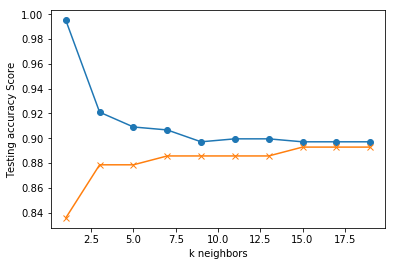

In [9]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test, y_test))

k=7 Test Acc: 0.886


/Users/paul/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [29]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test, y_test))

k=15 Test Acc: 0.893


/Users/paul/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [30]:
#recommend_list = pd.read_csv('brutaltruthrecs.csv', encoding = "ISO-8859-1")
recommend_list = pd.read_csv(member + 'recs.csv', encoding = "ISO-8859-1")

In [39]:
recommend_list = recommend_list[recommend_list["Score"] > 3.5]

In [40]:
new_beer_data = recommend_list[["Flavor","Hoppiness","Maltiness","Fruitiness","Body", "pDev",
          "Sweetness","Sour","spicy","bitter",'Aroma_None', 'Aroma_caramel', 
       'Aroma_floral', 'Aroma_fruit', 'Custom Flavor_None',
       'Custom Flavor_banana', 'Custom Flavor_brown sugar',
       'Custom Flavor_burnt', 'Custom Flavor_caramel',
       'Custom Flavor_chocolate', 'Custom Flavor_earthy',
       'Custom Flavor_herbal', 'Custom Flavor_pumpkin',
       'Custom Flavor_roasted', 'Custom Flavor_smoke', 'Custom Flavor_toasted',
       'Custom Flavor_wheat', 'Color_amber', 'Color_black', 'Color_dark ',
       'Color_gold', 'Color_pale']]
predicted_class = knn.predict(new_beer_data)
print(predicted_class)

['bad' 'bad' 'bad' ..., 'bad' 'bad' 'bad']


In [41]:
for item in predicted_class:
    print(item)

bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad


bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad


bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad


bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad


bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad


In [42]:
recommend_list["recommended"] = predicted_class

In [43]:
recommend_list[recommend_list["recommended"] =="good"]["Style"]

10071      American Stout
10094      American Stout
10170      American Stout
10243      American Stout
10272      American Stout
10375      American Stout
10395      American Stout
10854       Oatmeal Stout
12144    Belgian Pale Ale
Name: Style, dtype: object

In [44]:
df = recommend_list[recommend_list["recommended"] == "good"].sort_values("Score", ascending=False).groupby("Style").head(2)

In [45]:
recommend_list[recommend_list["recommended"] == "good"]

,beer_link,rDev,user_rating,ABV,Availaility,Brewer,BrosScore,ImageLink,Location,Name,...,Custom Flavor_roasted,Custom Flavor_smoke,Custom Flavor_toasted,Custom Flavor_wheat,Color_amber,Color_black,Color_dark,Color_gold,Color_pale,recommended
10071,NaN,NaN,NaN,6.5,Rotating,Great Rhythm Brewing Company,0.0,https://cdn.beeradvocate.com/im/beers/151966.jpg,"New Hampshire, United States",Grateful Stout,...,1,0,0,0,0,1,0,0,0,good
10094,NaN,NaN,NaN,6.9,Rotating,Other Half Brewing Co.,0.0,https://cdn.beeradvocate.com/im/placeholder-be...,"New York, United States",Exp 06300 Stout,...,1,0,0,0,0,1,0,0,0,good
10170,NaN,NaN,NaN,7.4,Limited(brewedonce),WeldWerks Brewing Co.,0.0,https://cdn.beeradvocate.com/im/beers/312829.jpg,"Colorado, United States",German chocolate cake stout,...,1,0,0,0,0,1,0,0,0,good
10243,NaN,NaN,NaN,13.7,Rotating,Tioga-Sequoia Brewing Company,0.0,https://cdn.beeradvocate.com/im/beers/231348.jpg,"California, United States",Mocha Midnight - Bourbon Barrel Aged,...,1,0,0,0,0,1,0,0,0,good
10272,NaN,NaN,NaN,8.0,Rotating,Blue Pants Brewery,0.0,https://cdn.beeradvocate.com/im/beers/213856.jpg,"Alabama, United States",Coffee And Milk Pinstripe Stout,...,1,0,0,0,0,1,0,0,0,good
10375,NaN,NaN,NaN,7.0,Rotating,Tuatara Brewing Co.,0.0,https://cdn.beeradvocate.com/im/beers/99586.jpg,New Zealand (Aotearoa),Tuatara Black,...,1,0,0,0,0,1,0,0,0,good
10395,NaN,NaN,NaN,8.5,Rotating,Wicked Weed Brewing,0.0,https://cdn.beeradvocate.com/im/placeholder-be...,"North Carolina, United States",Aye-Aye Stout,...,1,0,0,0,0,1,0,0,0,good
10854,NaN,NaN,NaN,6.0,Limited(brewedonce),Foley Brothers Brewing,0.0,https://cdn.beeradvocate.com/im/beers/293275.jpg,"Vermont, United States",Long Beards Oatmeal,...,1,0,0,0,0,1,0,0,0,good
12144,NaN,NaN,NaN,5.3,Year-round,Ladyface Ale Companie,0.0,https://cdn.beeradvocate.com/im/placeholder-be...,"California, United States",La Blonde,...,0,0,1,0,0,0,0,0,1,good


In [38]:
df["Style"]

10243      American Stout
10170      American Stout
10854       Oatmeal Stout
12144    Belgian Pale Ale
Name: Style, dtype: object